## What is the most optimal skill to learn for Data Analysts?

### Methodology

    1. Group skills to determine median salary and likelihood of being in posting
    2. Visualize median salary vs percent skill demand
    3. (Optional) Determine if certain technologies are more relevant

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [4]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [5]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


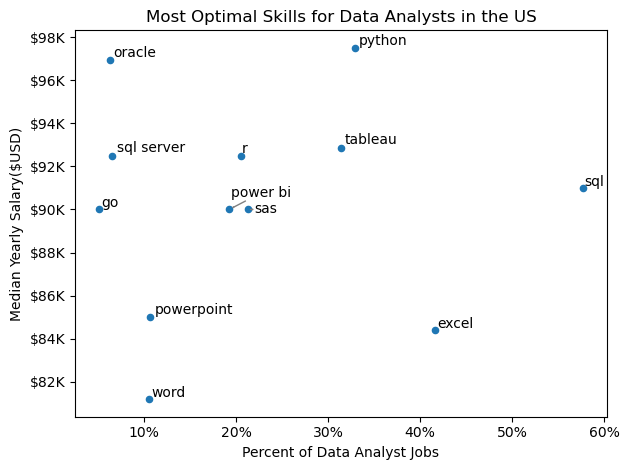

In [6]:
from adjustText import adjust_text

df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary($USD)')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.tight_layout()
plt.show()

In [7]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row) # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict: # if key already exists, add value to existing key
            technology_dict[key] += value
        else:                      # if key doesn't exists, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set them back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['sap',
  'powerbi',
  'esquisse',
  'sharepoint',
  'qlik',
  'excel',
  'ms access',
  'datarobot',
  'cognos',
  'visio',
  'splunk',
  'nuix',
  'sas',
  'microstrategy',
  'sheets',
  'alteryx',
  'powerpoint',
  'spss',
  'outlook',
  'spreadsheet',
  'msaccess',
  'ssis',
  'dax',
  'looker',
  'power bi',
  'word',
  'tableau',
  'ssrs'],
 'programming': ['crystal',
  'mongodb',
  'typescript',
  'groovy',
  'f#',
  'no-sql',
  'javascript',
  'ruby',
  'html',
  'rust',
  'assembly',
  'elixir',
  'ocaml',
  'php',
  'mongo',
  'css',
  'c++',
  'visualbasic',
  't-sql',
  'powershell',
  'clojure',
  'kotlin',
  'vb.net',
  'java',
  'lua',
  'vba',
  'matlab',
  'pascal',
  'sas',
  'visual basic',
  'scala',
  'lisp',
  'c#',
  'sql',
  'perl',
  'swift',
  'r',
  'objective-c',
  'dart',
  'fortran',
  'solidity',
  'sass',
  'golang',
  'haskell',
  'python',
  'apl',
  'go',
  'shell',
  'c',
  'cobol',
  'nosql',
  'julia',
  'delphi',
  'bash',
  'erl

In [8]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,sap
0,analyst_tools,powerbi
0,analyst_tools,esquisse
0,analyst_tools,sharepoint
0,analyst_tools,qlik
...,...,...
9,sync,ringcentral
9,sync,unify
9,sync,rocketchat
9,sync,mattermost


In [9]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

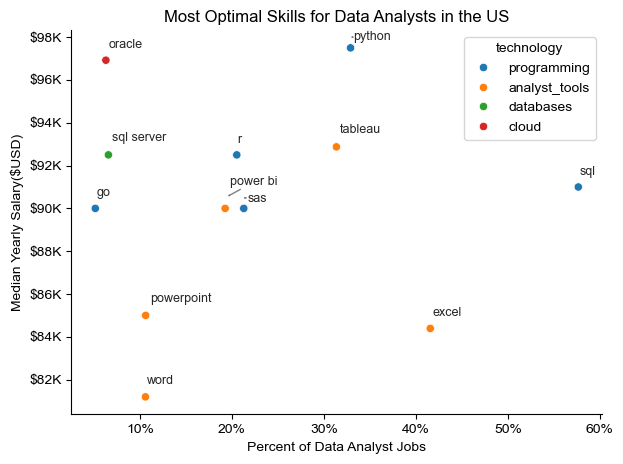

In [10]:
from adjustText import adjust_text

#df_DA_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(
    df_DA_skills_high_demand['skill_percent'].iloc[i],
    df_DA_skills_high_demand['median_salary'].iloc[i] + 500,  # shift labels up
    txt,
    fontsize=9
))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary($USD)')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.tight_layout()
plt.show()